## Diabetes prediction

A Comprehensive Dataset for Predicting Diabetes with Medical & Demographic Data

Dataset link : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
print("Data Shape:")
print(df.shape)

Data Shape:
(100000, 9)


In [4]:
print("\nData Columns:")
print(df.columns)


Data Columns:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [5]:
print("\nData types:")
print(df.info())


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [6]:
print("\nData Summary:")
pd.DataFrame(df.describe())


Data Summary:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [8]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
3854


In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.shape

(96146, 9)

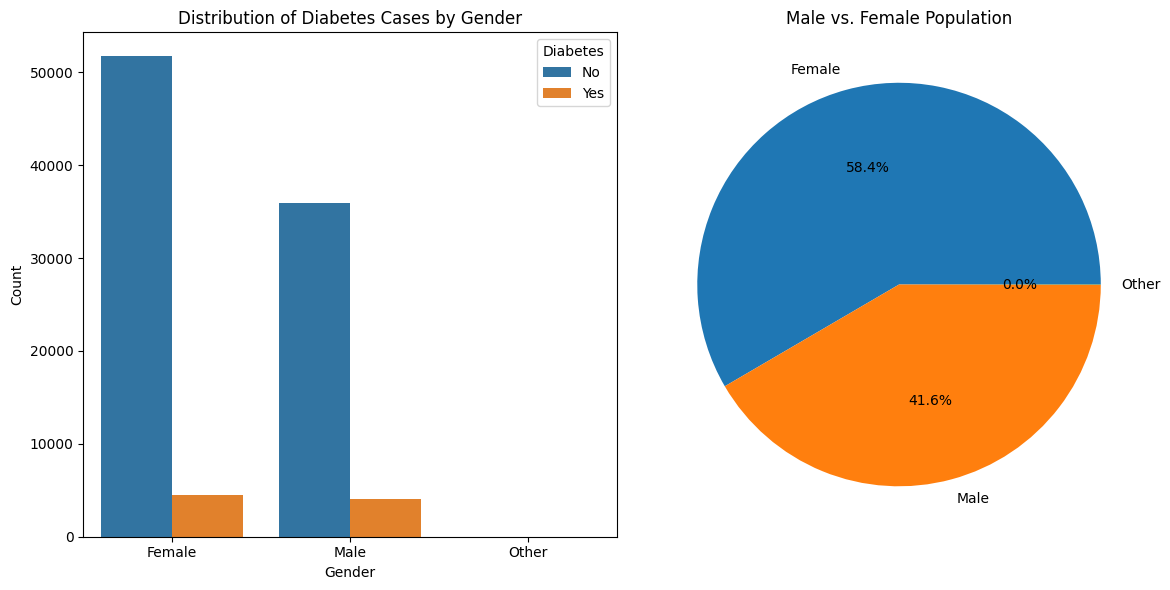

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Bar plot - Distribution of diabetes cases by gender
sns.countplot(data=df, x='gender', hue='diabetes', ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Diabetes Cases by Gender')
axes[0].legend(title='Diabetes', labels=['No', 'Yes'])

# Plot 2: Pie chart - Male vs. Female population
gender_counts = df['gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axes[1].set_title('Male vs. Female Population')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


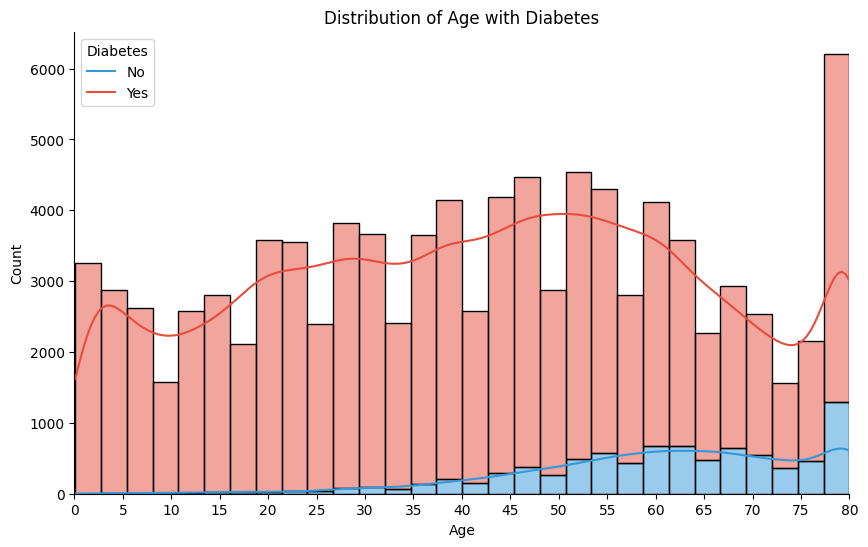

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Customize histogram
sns.histplot(data=df, x='age', hue='diabetes', kde=True, bins=30, multiple="stack", palette=['#E74C3C', '#3498DB'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age with Diabetes')
plt.legend(title='Diabetes', labels=['No', 'Yes'])

# Adjust spacing between bars
ax = plt.gca()
ax.set_xlim([0, df['age'].max()])  # Adjust x-axis limit
ax.set_xticks(range(0, int(df['age'].max()) + 1, 5))  # Set x-axis tick interval
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border

plt.show()


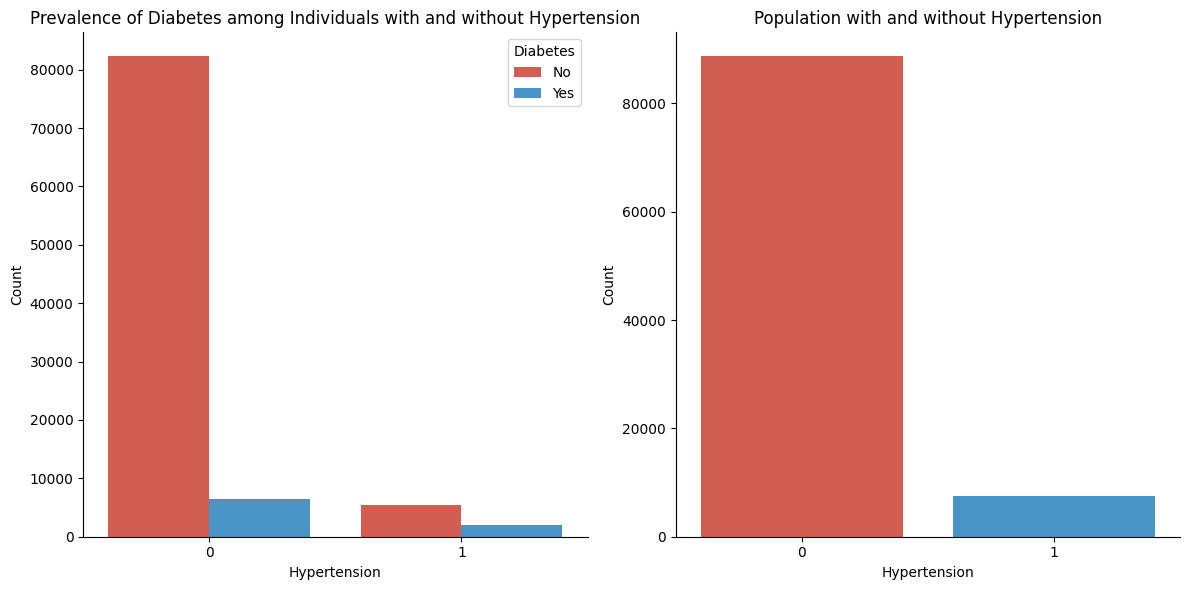

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(12, 6))

# Customize bar plot - Prevalence of Diabetes among Individuals with and without Hypertension
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='hypertension', hue='diabetes', palette=['#E74C3C', '#3498DB'])
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Prevalence of Diabetes among Individuals with and without Hypertension')
plt.legend(title='Diabetes', labels=['No', 'Yes'])

# Adjust spacing between bars
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)  # Remove top border
ax1.spines['right'].set_visible(False)  # Remove right border

# Customize bar plot - Population with or without Hypertension
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='hypertension', palette=['#E74C3C', '#3498DB'])
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Population with and without Hypertension')

# Adjust spacing between bars
ax2 = plt.gca()
ax2.spines['top'].set_visible(False)  # Remove top border
ax2.spines['right'].set_visible(False)  # Remove right border

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


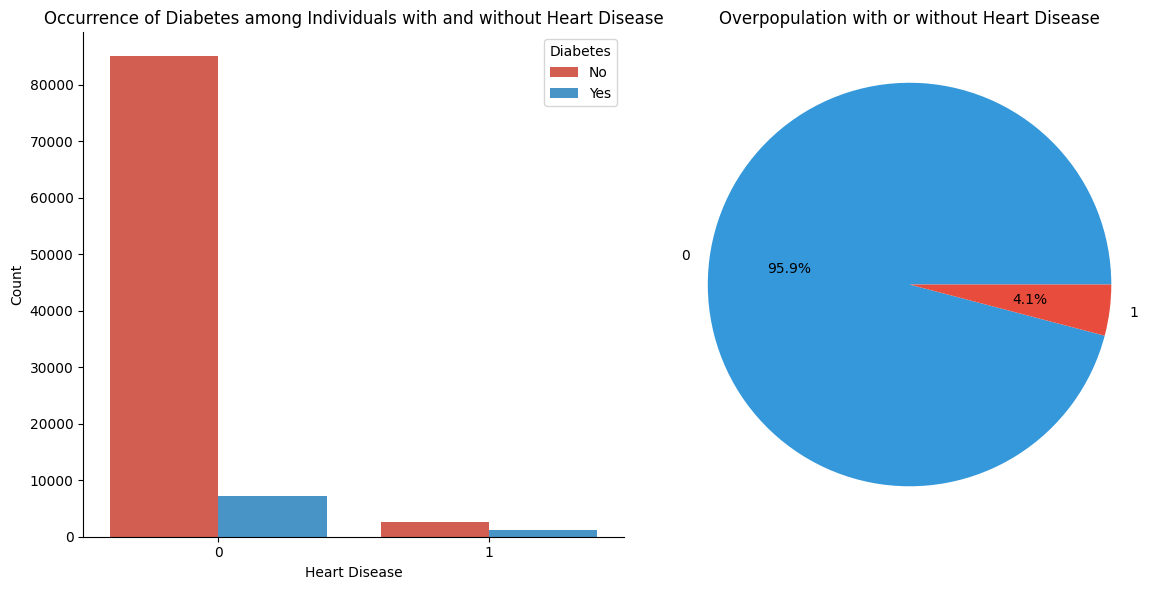

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Customize bar plot - Occurrence of Diabetes among Individuals with and without Heart Disease
sns.countplot(data=df, x='heart_disease', hue='diabetes', palette=['#E74C3C', '#3498DB'], ax=axs[0])
axs[0].set_xlabel('Heart Disease')
axs[0].set_ylabel('Count')
axs[0].set_title('Occurrence of Diabetes among Individuals with and without Heart Disease')
axs[0].legend(title='Diabetes', labels=['No', 'Yes'])
axs[0].spines['top'].set_visible(False)  # Remove top border
axs[0].spines['right'].set_visible(False)  # Remove right border

# Customize pie plot - Overpopulation with or without Heart Disease
heart_disease_counts = df['heart_disease'].value_counts()
axs[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', colors=['#3498DB', '#E74C3C'])
axs[1].set_title('Overpopulation with or without Heart Disease')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


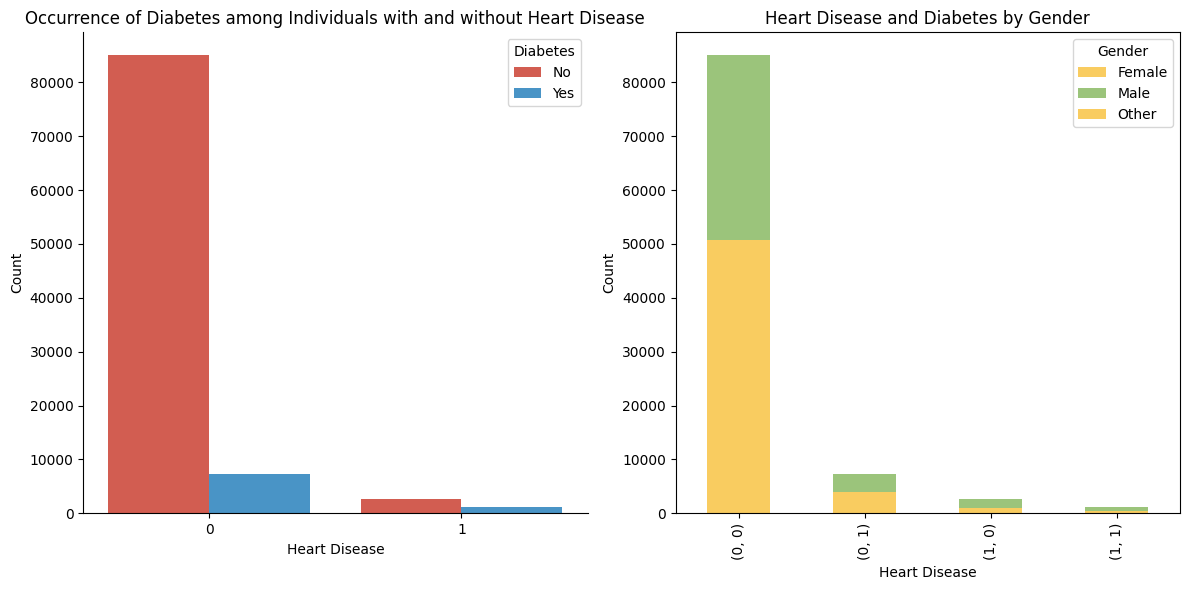

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Customize bar plot - Occurrence of Diabetes among Individuals with and without Heart Disease
sns.countplot(data=df, x='heart_disease', hue='diabetes', palette=['#E74C3C', '#3498DB'], ax=axs[0])
axs[0].set_xlabel('Heart Disease')
axs[0].set_ylabel('Count')
axs[0].set_title('Occurrence of Diabetes among Individuals with and without Heart Disease')
axs[0].legend(title='Diabetes', labels=['No', 'Yes'])
axs[0].spines['top'].set_visible(False)  # Remove top border
axs[0].spines['right'].set_visible(False)  # Remove right border

# Customize stacked bar plot - Heart Disease and Diabetes by Gender
heart_diabetes_gender_counts = df.groupby(['heart_disease', 'diabetes', 'gender']).size().unstack(fill_value=0)
heart_diabetes_gender_counts.plot(kind='bar', stacked=True, ax=axs[1], color=['#F9C74F', '#90BE6D'], alpha=0.9)

# Add plot labels and title
axs[1].set_xlabel('Heart Disease')
axs[1].set_ylabel('Count')
axs[1].set_title('Heart Disease and Diabetes by Gender')
axs[1].legend(title='Gender')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


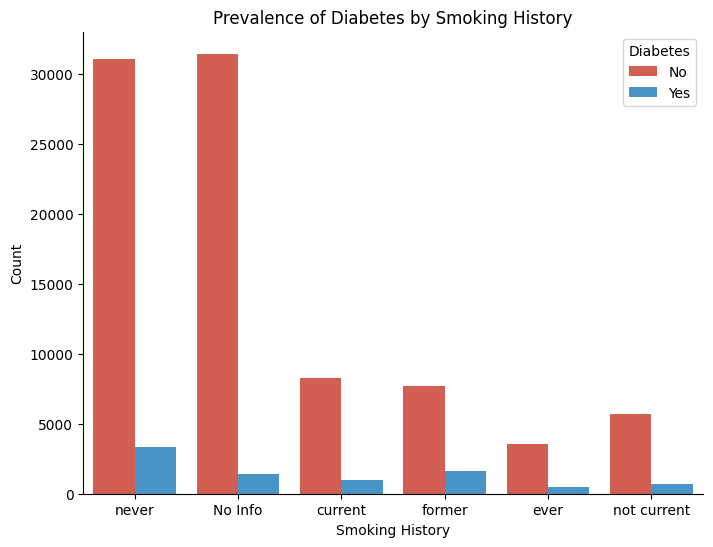

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 6))

# Customize bar plot
sns.countplot(data=df, x='smoking_history', hue='diabetes', palette=['#E74C3C', '#3498DB'])
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Prevalence of Diabetes by Smoking History')
plt.legend(title='Diabetes', labels=['No', 'Yes'])

# Adjust spacing between bars
ax = plt.gca()
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border

plt.show()


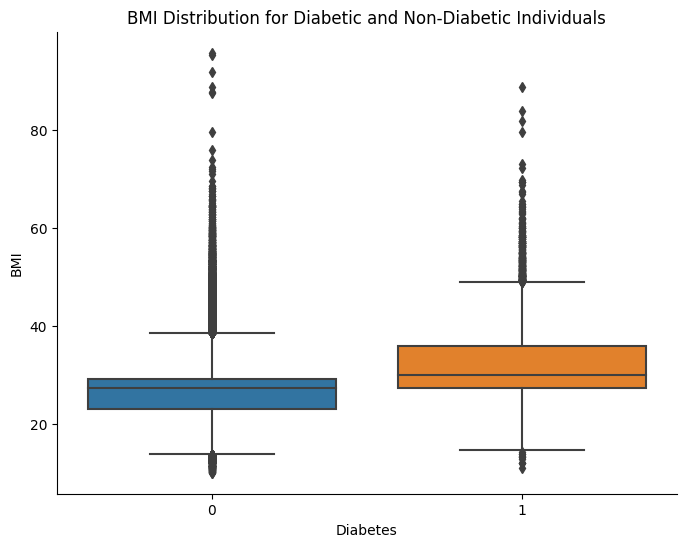

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='diabetes', y='bmi')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.title('BMI Distribution for Diabetic and Non-Diabetic Individuals')

ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  

plt.show()

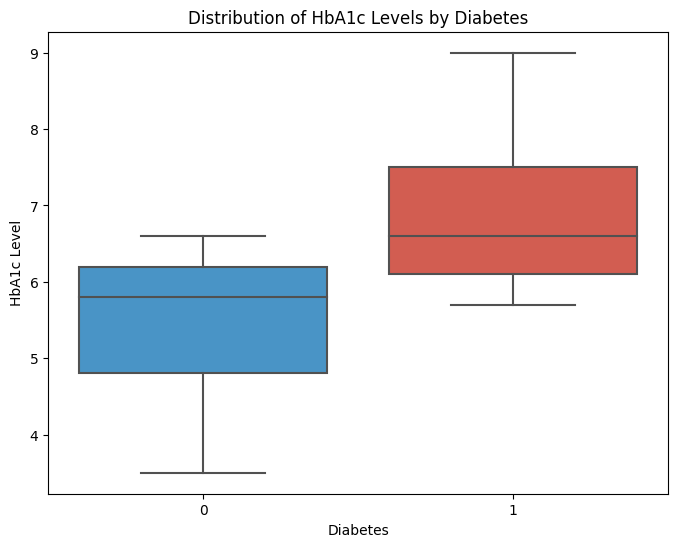

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 6))

# Customize box plot
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette=['#3498DB', '#E74C3C'])
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.title('Distribution of HbA1c Levels by Diabetes')

plt.show()


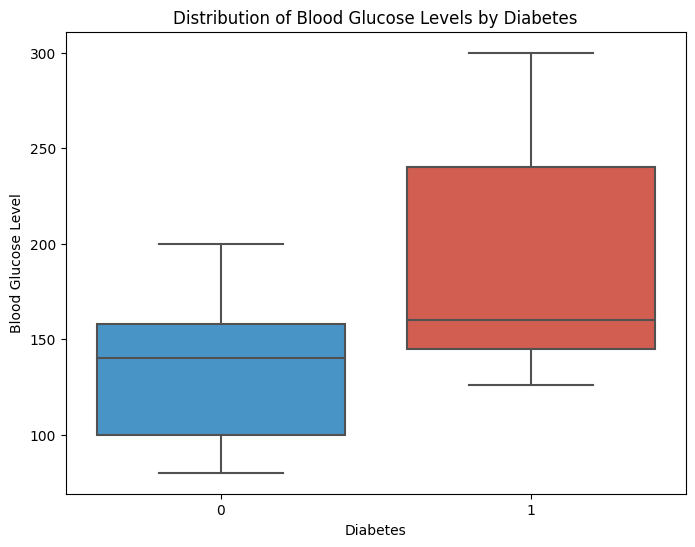

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 6))

# Customize box plot
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', palette=['#3498DB', '#E74C3C'])
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.title('Distribution of Blood Glucose Levels by Diabetes')

plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform(df[column])
    df[column] = encoded_values

In [21]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


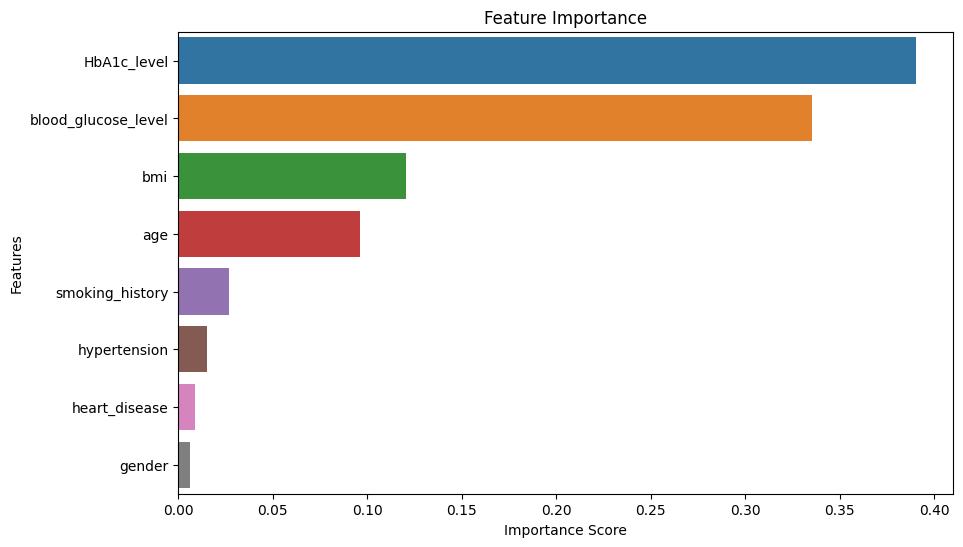

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# num_features = int(input("Enter the number of features to select: "))
num_features = 15

target_variable = "diabetes"
X = df.drop(target_variable, axis=1)
y = df[target_variable]

model = RandomForestClassifier()  
model.fit(X, y)
importance_scores = model.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()                                                                                           
feature_importance = pd.Series(importance_scores, index=X.columns)                           # Plotting feature importance
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [23]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

def examine_dataset(df, target_column):
    """
    Examine the dataset to check if there is an imbalance in the target column.

    Parameters:
        - df (pandas DataFrame): The input DataFrame.
        - target_column (str): The name of the target column.

    Returns:
        - bool: True if the dataset is imbalanced, False otherwise.
    """
    class_counts = df[target_column].value_counts()
    imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[1]
    print("Class Distribution:")
    print(class_counts)
    print("Imbalance Ratio:", imbalance_ratio)
    return imbalance_ratio > 2.0

def handle_imbalanced_data(df, target_column):
    """
    Handle imbalanced pandas DataFrame based on user-selected option.

    Parameters:
        - df (pandas DataFrame): The input DataFrame.
        - target_column (str): The name of the target column.

    Returns:
        - pandas DataFrame: The balanced DataFrame.
    """
    imbalance = examine_dataset(df, target_column)
    if not imbalance:
        print("No imbalance found in the dataset.")
        return df
    
    print("Select an option to handle the imbalanced dataset:")
    print("1. Random Oversampling")
    print("2. Random Undersampling")
    print("3. SMOTE (Synthetic Minority Over-sampling Technique)")
    print("4. ADASYN (Adaptive Synthetic)")
    print("5. Proceed without handling")
    choice = input("Enter your choice (1-5): ")

    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    if choice == '1':
        # Apply random oversampling
        oversampler = RandomOverSampler()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '2':
        # Apply random undersampling
        undersampler = RandomUnderSampler()
        X_resampled, y_resampled = undersampler.fit_resample(X, y)
    elif choice == '3':
        # Apply SMOTE
        oversampler = SMOTE()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '4':
        # Apply ADASYN
        oversampler = ADASYN()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '5':
        # Proceed without handling
        print("Proceeding without handling the imbalanced dataset.")
        return df
    else:
        print("Invalid choice. Proceeding without handling the imbalanced dataset.")
        return df

    # Create a new balanced DataFrame
    balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

    return balanced_df


df = handle_imbalanced_data(df, 'diabetes')
df.shape

Class Distribution:
0    87664
1     8482
Name: diabetes, dtype: int64
Imbalance Ratio: 10.335298278707851
Select an option to handle the imbalanced dataset:
1. Random Oversampling
2. Random Undersampling
3. SMOTE (Synthetic Minority Over-sampling Technique)
4. ADASYN (Adaptive Synthetic)
5. Proceed without handling
Enter your choice (1-5): 2


(16964, 9)

# Classification Models

### Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

f1_score = f1_score(y_test, y_pred)
print(f"f1_score: {f1_score}")

auc_roc = roc_auc_score(y_test, y_pred)
print(f"auc_roc: {auc_roc}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8520483348069555
precision: 0.873266078184111
recall: 0.8214709371293001
f1_score: 0.8465770171149144
auc_roc: 0.8518602488809945
[[1506  201]
 [ 301 1385]]


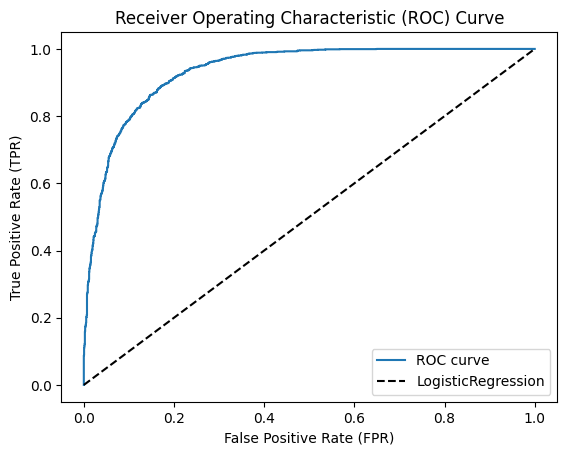

In [25]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='LogisticRegression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"f1_score: {f1}")

auc_roc = roc_auc_score(y_test, y_pred)
print(f"auc_roc: {auc_roc}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9062776304155614
precision: 0.9105642256902761
recall: 0.8997627520759194
f1_score: 0.9051312649164678
auc_roc: 0.9062375564714686
[[1558  149]
 [ 169 1517]]


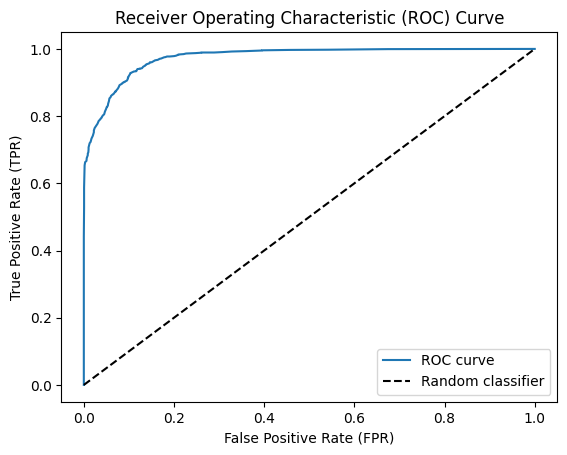

In [27]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Support Vector Classifier

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

f1_score = f1_score(y_test, y_pred)
print(f"f1_score: {f1_score}")

auc_roc = roc_auc_score(y_test, y_pred)
print(f"auc_roc: {auc_roc}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8620689655172413
precision: 0.839086859688196
recall: 0.8938315539739027
f1_score: 0.8655944859276278
auc_roc: 0.8622643417204019
[[1418  289]
 [ 179 1507]]


### LGBMClassifier

In [30]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

f1_score = f1_score(y_test, y_pred)
print(f"f1_score: {f1_score}")

auc_roc = roc_auc_score(y_test, y_pred)
print(f"auc_roc: {auc_roc}")


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9133510167992926
precision: 0.9074941451990632
recall: 0.9193357058125742
f1_score: 0.9133765468473778
auc_roc: 0.9133878294733638
[[1549  158]
 [ 136 1550]]


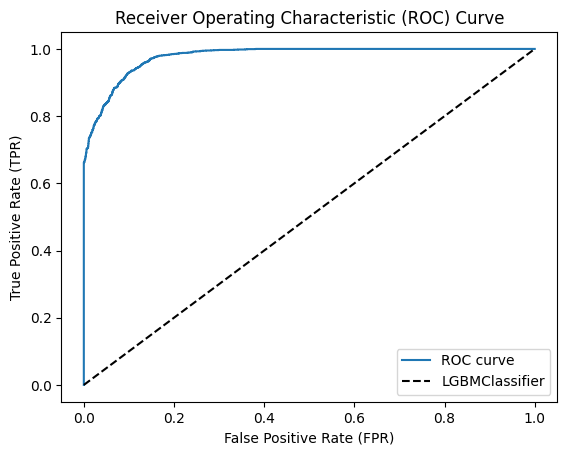

In [31]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='LGBMClassifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

 - **Accuracy:** The accuracy of the model is 0.9092, which indicates that the model correctly predicts the person's diabetic or non-diabetic status approximately 90.9% of the time.


 - **Precision:** The precision score is 0.9001, which implies that when the model predicts a person as diabetic, it is correct around 90.0% of the time. Similarly, when the model predicts a person as non-diabetic, it is correct approximately 90.0% of the time.
 

 - **Recall:** The recall score is 0.9193, indicating that the model identifies around 91.9% of the actual diabetics correctly.


 - **F1-Score:** The F1-score is 0.9096, which is a balanced measure of precision and recall. It considers both false positives and false negatives, providing an overall assessment of the model's performance.


 - **AUC-ROC:** The AUC-ROC score is 0.9093, which represents the area under the Receiver Operating Characteristic (ROC) curve. It is a measure of how well the model can distinguish between diabetic and non-diabetic individuals. A value close to 1 indicates a strong predictive model.
  - For reference : https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/


 - **Confusion Matrix:** The confusion matrix provides a more detailed breakdown of the model's predictions. It shows that out of 1839 actual non-diabetic individuals, the model correctly predicted 1535 of them, but misclassified 172 as diabetic. Similarly, out of 1686 actual diabetic individuals, the model correctly predicted 1550 of them, but misclassified 136 as non-diabetic.

 > Overall, the model demonstrates good performance in predicting whether a person is diabetic or not, with high accuracy, precision, recall, and F1-score. The AUC-ROC score indicates a strong ability to discriminate between the two classes.

In [32]:
import pickle

model_filename = 'model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved to {model_filename}")


Model saved to model.pkl
